In [1]:
# Import dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os

# Set visualization defaults
sns.set_context('notebook')
plt.style.use('seaborn-darkgrid')
%matplotlib inline 

# Set input directory from model training, ouput director for storing visualizations
INPUT_DIR = 'DDQN_model_output/'
OUTPUT_DIR = 'Assets/'
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)
    
# Establish model training hyperparameters
TOTAL_FRAMES = 2 * 10**5 # Total frames for DDQN training
TRAINING_START = 10**4 # Frames simulated before DDQN training begins
TRAINING_FREQUENCY = 3 # Game frames per model training step
DECAY_STEPS = 2 * 10**4 # Training steps spent performing ε-greedy learning

# Plot Training Performance
Visualize Huber Loss performance over full model training $2*10^{5}$ frames and clipped ([0,5]) loss over post ε-greedy learning period:

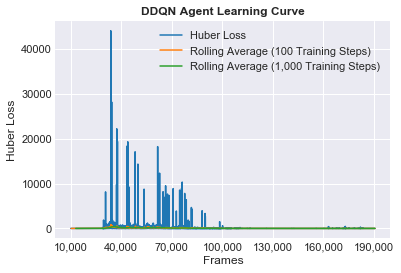

In [2]:
# Visualize Loss performance
## Read in loss history
loss = pd.read_csv(INPUT_DIR + 'training_loss.csv', header = None)

## Calculate rolling averages at 100 and 1K frame intervals
rolling_mean_loss_100 = loss.rolling(100).mean()
rolling_mean_loss_1K = loss.rolling(1000).mean()

## Plot Learning Curve
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(loss, label = 'Huber Loss')
plt.plot(rolling_mean_loss_100, label = 'Rolling Average (100 Training Steps)')
plt.plot(rolling_mean_loss_1K, label = 'Rolling Average (1,000 Training Steps)')

plt.title('DDQN Agent Learning Curve', fontweight = 'bold')
plt.xlabel('Frames')
plt.ylabel('Huber Loss')

ax.set_xticklabels(['{:,.0f}'.format(TRAINING_START + x * TRAINING_FREQUENCY) for x in ax.get_xticks()])

plt.legend()

plt.savefig(OUTPUT_DIR + 'Learning Curve.png')

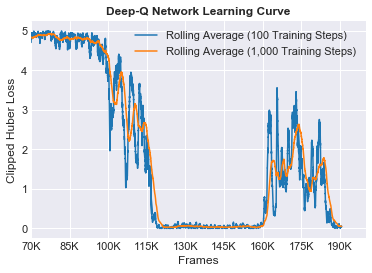

In [3]:
# Plot Clipped Learning Curve
fig = plt.figure()
ax = fig.add_subplot(111)

## Clip Loss to [0,5]
loss_length = len(loss)
clipped_loss = pd.Series(np.minimum(np.array(loss).reshape(loss_length,), 5 * np.ones(loss_length)))

## Calculate rolling averages for clipped loss at 100 and 1K frame intervals
rolling_mean_clipped_loss_100 = clipped_loss.rolling(100).mean()
rolling_mean_clipped_loss_1K = clipped_loss.rolling(1000).mean()

## Plot learning curves for rolling averages
plt.plot(rolling_mean_clipped_loss_100, label = 'Rolling Average (100 Training Steps)')
plt.plot(rolling_mean_clipped_loss_1K, label = 'Rolling Average (1,000 Training Steps)')

plt.title('Deep-Q Network Learning Curve', fontweight = 'bold')
plt.xlabel('Frames')
plt.ylabel('Clipped Huber Loss')

plt.xlim(DECAY_STEPS, (TOTAL_FRAMES - TRAINING_START)/TRAINING_FREQUENCY)
ax.set_xticklabels(['{:.0f}K'.format((TRAINING_START + x * TRAINING_FREQUENCY)/1000) for x in ax.get_xticks()])

plt.legend()

plt.savefig(OUTPUT_DIR + 'Clipped Learning Curve.png')

# Plot Scoring Performance
Plot epsidoe-level Atari game score and game duration over model training:

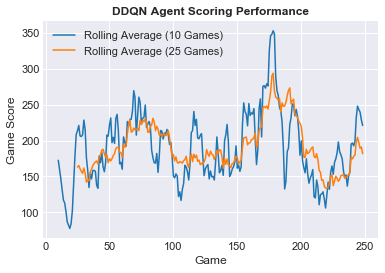

In [4]:
# Read in training performance history 
training_history = pd.read_csv(INPUT_DIR + 'training_history.csv', index_col = 'game')

# Calculate rolling game-score averages at 10- and 25-episode intervals
rolling_mean_score_10 = pd.Series(training_history.score).rolling(10).mean()
rolling_mean_score_25 = pd.Series(training_history.score).rolling(25).mean()

# Plot Game Scoring Performance
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(rolling_mean_score_10, label = 'Rolling Average (10 Games)')
plt.plot(rolling_mean_score_25, label = 'Rolling Average (25 Games)')

plt.title('DDQN Agent Scoring Performance', fontweight = 'bold')
plt.xlabel('Game')
plt.ylabel('Game Score')

plt.legend()

plt.savefig(OUTPUT_DIR + 'Scoring Curve.png')

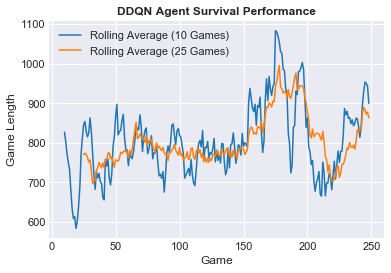

In [5]:
# Calculate rolling game-length averages at 10- and 25-episode intervals
rolling_mean_gl_10 = pd.Series(training_history.length).rolling(10).mean()
rolling_mean_gl_25 = pd.Series(training_history.length).rolling(25).mean()

# Plot Agent Survival Performance
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(rolling_mean_gl_10, label = 'Rolling Average (10 Games)')
plt.plot(rolling_mean_gl_25, label = 'Rolling Average (25 Games)')

plt.title('DDQN Agent Survival Performance', fontweight = 'bold')
plt.xlabel('Game')
plt.ylabel('Game Length')

plt.legend()

plt.savefig(OUTPUT_DIR + 'Survival Curve.png')